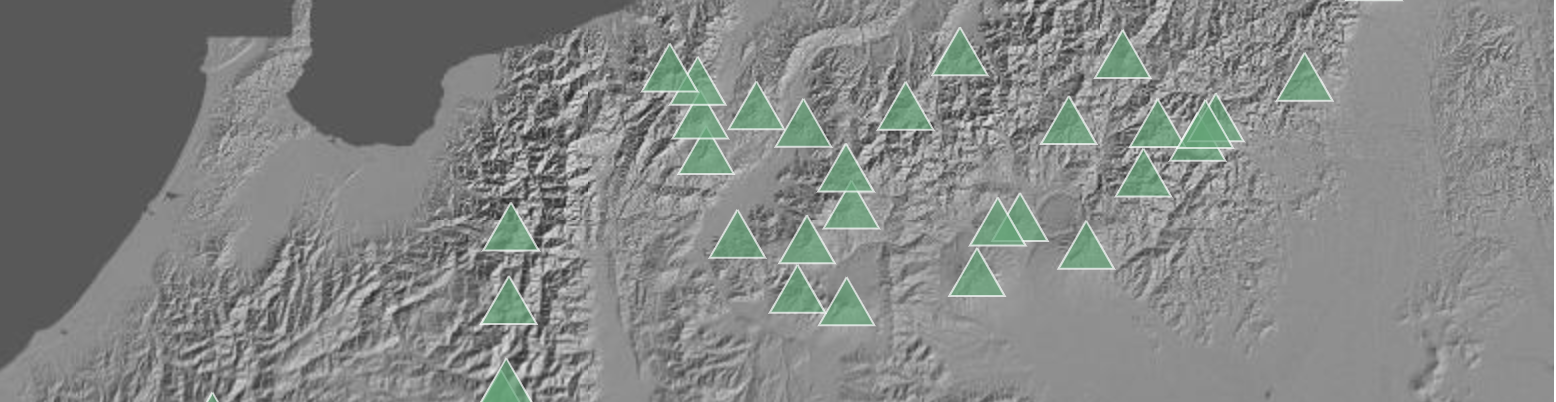

The dataset is provided by Kaggle: https://www.kaggle.com/heyrobin/list-of-volcanoes-in-japan


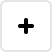
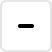
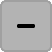
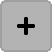
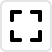
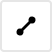
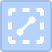
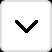
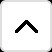
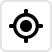

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from lets_plot import *
from lets_plot import tilesets
LetsPlot.setup_html()
LetsPlot.set(tilesets.NASA_GREYSCALE_SHADED_RELIEF_30M)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/japan_volcano.csv", encoding='utf-8')
df.head()

Unnamed: 0                        Name Elevation_meters Elevation_ft  \
0           0            Akaigawa Caldera              725         2379   
1           1           Mount Atosanupuri              512         1680   
2           2  Daisetsuzan Volcanic Group             2290         7513   
3           3                 Mount Eniwa             1320         4331   
4           4                  Mount Esan              613         2028   

              Coordinates Last_eruption    Region  
0   ﻿43.083°N 140.817°E﻿      1.3 Ma BP  Hokkaido  
1   ﻿43.610°N 144.438°E﻿    1000-200 BP  Hokkaido  
2   ﻿43.663°N 142.854°E﻿        AD 1739  Hokkaido  
3   ﻿42.793°N 141.285°E﻿   17th century  Hokkaido  
4   ﻿41.804°N 141.166°E﻿        AD 1874  Hokkaido

### Convert coordinates from string representation to decomal degrees.

In [3]:
# Split one string into a list of strings.
coords_unpacked = (df.Coordinates.str.split(' ').apply(lambda lst: [s.split('°') for s in lst])  
     .apply(lambda lst: np.concatenate(lst))                                       # flatten list of strings
     .apply(lambda lst: list(filter(lambda v: len(v)>0, lst))))                    # remove empty strings 
coords_unpacked[0:5]

0    [﻿43.083, N, 140.817, E﻿]
1    [﻿43.610, N, 144.438, E﻿]
2    [﻿43.663, N, 142.854, E﻿]
3    [﻿42.793, N, 141.285, E﻿]
4    [﻿41.804, N, 141.166, E﻿]
Name: Coordinates, dtype: object

In [4]:
latitudes = [float(l[0][1:]) for l in coords_unpacked]  # here also skip the BOM (\ufeff symbol)
longitudes = [float(l[2]) for l in coords_unpacked]

### Convert original dataframe to GeoDataframe containing volcano locations in the "geometry" column.

In [5]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(longitudes, latitudes))
gdf.head()

Unnamed: 0                        Name Elevation_meters Elevation_ft  \
0           0            Akaigawa Caldera              725         2379   
1           1           Mount Atosanupuri              512         1680   
2           2  Daisetsuzan Volcanic Group             2290         7513   
3           3                 Mount Eniwa             1320         4331   
4           4                  Mount Esan              613         2028   

              Coordinates Last_eruption    Region                    geometry  
0   ﻿43.083°N 140.817°E﻿      1.3 Ma BP  Hokkaido  POINT (140.81700 43.08300)  
1   ﻿43.610°N 144.438°E﻿    1000-200 BP  Hokkaido  POINT (144.43800 43.61000)  
2   ﻿43.663°N 142.854°E﻿        AD 1739  Hokkaido  POINT (142.85400 43.66300)  
3   ﻿42.793°N 141.285°E﻿   17th century  Hokkaido  POINT (141.28500 42.79300)  
4   ﻿41.804°N 141.166°E﻿        AD 1874  Hokkaido  POINT (141.16600 41.80400)

### Create a symbol map showing volcano locations.

In [6]:
nice_view_options = dict(
    location = [129.450953, 30.151413, 144.875758, 42.515155],
    zoom = 6
)

In [7]:
(ggplot() + geom_livemap(**nice_view_options) + 
 geom_point(data=gdf, 
            tooltips=layer_tooltips(["Name", "Region", "Last_eruption"])
                .line("Elevation | @Elevation_meters(m)/@Elevation_ft(ft)")
                .color("black"), 
            fill='#75DFBD', color='white', shape=24, size=14, alpha=.7) + 
 ggsize(800, 800)
)

WARN: The function color() is deprecated and is no longer supported.


### Create couple of maps showing distribution of volcanoes across Japan.

In [8]:
coords_data = dict(
    lon=longitudes,
    lat=latitudes
)

(ggplot(coords_data) + geom_livemap() + 
 geom_bin2d(aes("lon", "lat"), bins=[10, 15], alpha=.7, show_legend=False) +
 ggsize(800, 800)
) 

In [9]:
(ggplot(coords_data) + geom_livemap(**nice_view_options) + 
 geom_density2d(aes("lon", "lat"), color="orange") +
 ggsize(800, 800)
) 

In [10]:
(ggplot(coords_data) + geom_livemap() + 
 geom_bin2d(aes("lon", "lat"), bins=[10, 15], alpha=.7, show_legend=False) +
 geom_density2d(aes("lon", "lat"), color="orange") +
 ggsize(800, 800)
) 